Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027

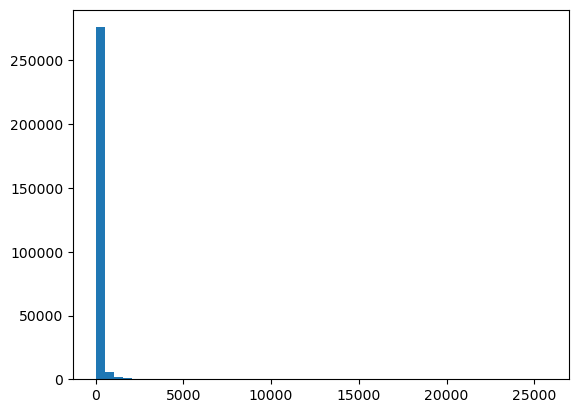

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('creditcard.csv')

# Check for missing values
print(df.isnull().sum())

# Get summary statistics
print(df.describe())

# Visualize the distribution of the 'Amount' column
plt.hist(df['Amount'], bins=50)
plt.show()

In [ ]:
# Handle missing values
df.fillna(df.mean(), inplace=True)

# Standardize the 'Amount' column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

In [ ]:
# Oversample the minority class (frauds)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(df.drop('Class', axis=1), df['Class'])

In [ ]:
# Create new features (e.g., interaction terms)
df['V1_V2'] = df['V1'] * df['V2']

In [ ]:
# Choose a classification model (e.g., random forest)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

In [ ]:
# Evaluate the model on the testing data
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Save the trained model to a file
import pickle
with open('untitled2.pkl', 'wb') as f:
    pickle.dump(untitled2, f)